In [98]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [99]:
df = pd.read_csv("IPL_2023.csv")
df

,POS,Player,Mat,Inns,NO,Runs,HS,Avg,BF,SR,100,50,4s,6s
0,1,Faf Du Plessis\nRCB,14,14,1,730,84,56.15,475,153.68,0,8,60,36
1,2,Shubman Gill\nGT,14,14,2,680,104*,56.67,446,152.46,2,4,67,22
2,3,Virat Kohli\nRCB,14,14,2,639,101*,53.25,457,139.82,2,6,65,16
3,4,Yashasvi Jaiswal\nRR,14,14,1,625,124,48.08,382,163.61,1,5,82,26
4,5,Devon Conway\nCSK,14,13,2,585,92*,53.18,422,138.62,0,6,69,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158,159,Yudhvir Singh\nLSG,3,2,0,1,1,0.50,2,50.00,0,0,0,0
159,160,Noor Ahmad\nGT,10,2,0,1,1,0.50,4,25.00,0,0,0,0
160,161,Fazalhaq Farooqi\nSRH,4,1,1,1,1*,-,5,20.00,0,0,0,0
161,162,Nathan Ellis\nPBKS,10,2,0,1,1,0.50,7,14.28,0,0,0,0


In [100]:
df = df.dropna(axis=0)

In [101]:
#Seperating player name and team
df["Team"] = df["Player"].str.split('\n').str[-1]
df["Player"] = df["Player"].str.split('\n').str[0]

In [102]:
df.sort_values(by=['SR'])

,POS,Player,Mat,Inns,NO,Runs,HS,Avg,BF,SR,100,50,4s,6s,Team
162,163,Varun Chakaravarthy,14,2,1,1,1,1.00,9,11.11,0,0,0,0,KKR
161,162,Nathan Ellis,10,2,0,1,1,0.50,7,14.28,0,0,0,0,PBKS
160,161,Fazalhaq Farooqi,4,1,1,1,1*,-,5,20.00,0,0,0,0,SRH
159,160,Noor Ahmad,10,2,0,1,1,0.50,4,25.00,0,0,0,0,GT
150,151,Sandeep Sharma,12,2,2,2,2*,-,6,33.33,0,0,0,0,RR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,108,David Wiese,3,3,2,21,12*,21.00,11,190.90,0,0,0,3,KKR
115,116,Akash Deep,2,1,0,17,17,17.00,8,212.50,0,0,2,1,RCB
129,130,Mark Wood,4,2,1,11,10*,11.00,5,220.00,0,0,1,1,LSG
111,112,Umran Malik,8,2,1,19,19*,19.00,8,237.50,0,0,1,2,SRH


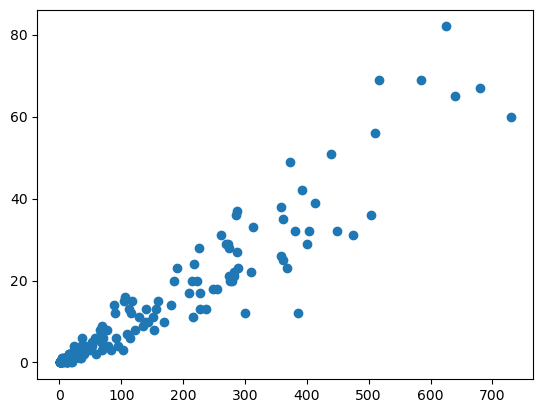

In [103]:
plt.scatter(df['Runs'],df['4s'])
#This shows correlation between total runs and 4s. It is roughly linear, but there is some variance

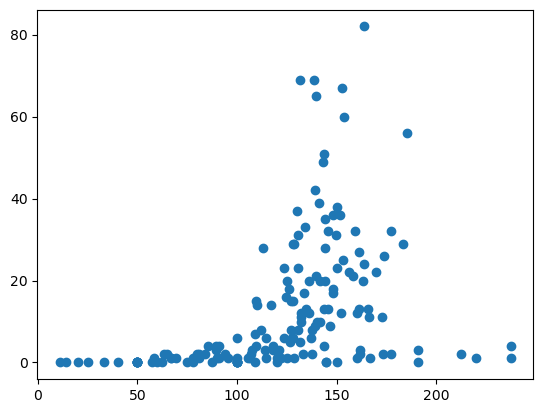

In [104]:
plt.scatter(df['SR'],df['4s'])
#This shows correlation between Strike Rate and 4s. 
#Surprising at first, very high strike rates have lower number of fours.
#This is probably because at very high strike rates, there are more sixes and fewer fours

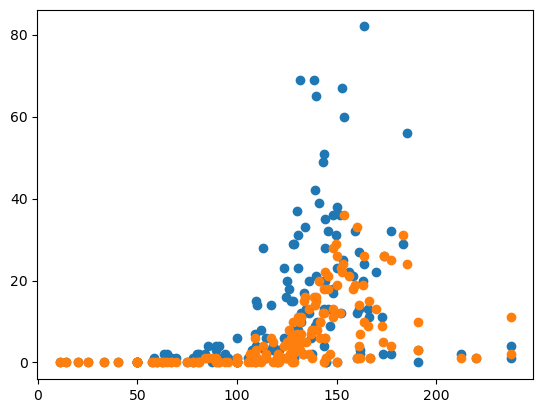

In [105]:
plt.scatter(df['SR'],df['4s'])
plt.scatter(df['SR'],df['6s'])
#It seems that my hypothesis was false.
#Another explaination could be that players playing very few balls have unusually high strike rates sometimes, and obviously have very less 4s and 6s

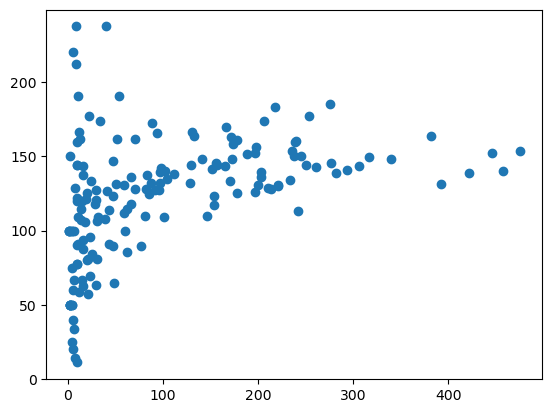

In [106]:
plt.scatter(df['BF'],df['SR'])
#That assumption looks correct, as only the players with low balls faced have unusually high SR

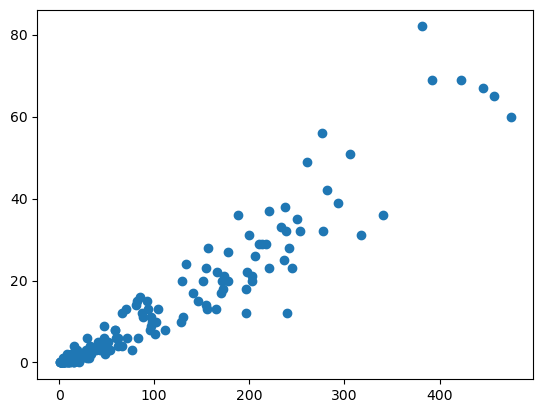

In [107]:
plt.scatter(df['BF'],df['4s'])
#As expected, number of fours is correlated with Balls faced linearly with some variance

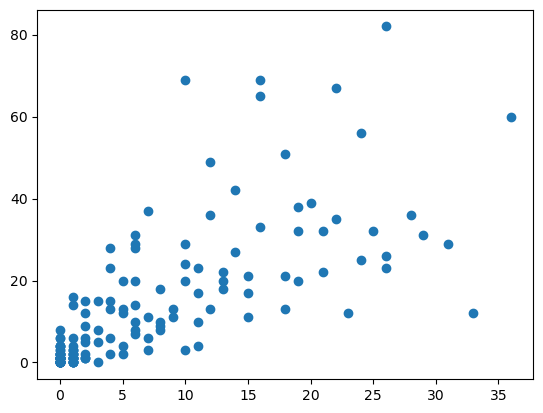

In [108]:
plt.scatter(df['6s'],df['4s'])
#Slightly unexpected, it has a lot of variance. One reason could be that players who tend to go for more 6s go for relatively less 4s and vice versa

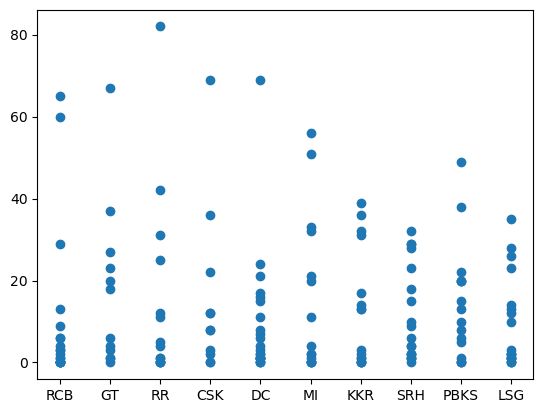

In [109]:
plt.scatter(df['Team'],df['4s'])
#As expected, not much correlation

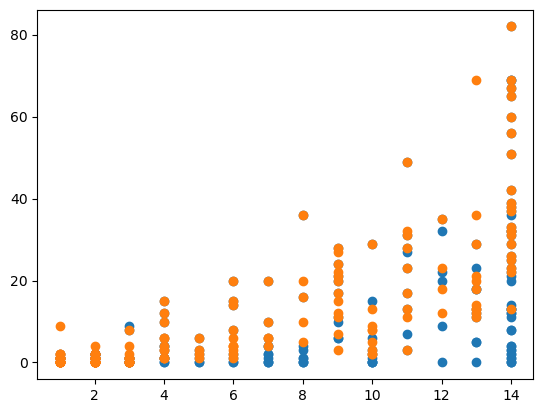

In [110]:
plt.scatter(df['Mat'],df['4s'])
plt.scatter(df['Inns'],df['4s'])
#The maximum is linearly related roughly, but not that useful for predicting

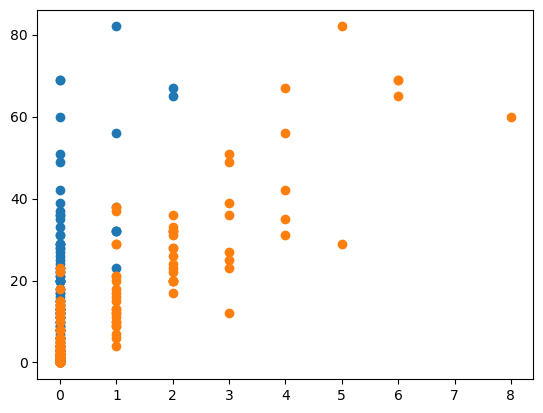

In [111]:
plt.scatter(df['100'],df['4s'])
plt.scatter(df['50'],df['4s'])
#Since  0 and 1 50s/100s are a lot, this will not be very useful for our model

In [94]:
#From all this, the number of 4s seem to be most correlated with balls faced and total runs

In [118]:
X = df[['Runs','BF']]
y = df[['4s']]
#Making the respective dataframes for X and y

In [119]:
X

,Runs,BF
0,730,475
1,680,446
2,639,457
3,625,382
4,585,422
...,...,...
158,1,2
159,1,4
160,1,5
161,1,7


In [120]:
y

,4s
0,60
1,67
2,65
3,82
4,69
...,...
158,0
159,0
160,0
161,0


C:\Users\DShah\AppData\Local\Temp\ipykernel_31380\536533475.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

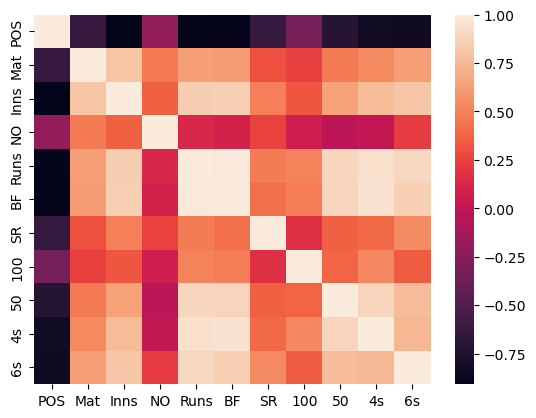

In [163]:
sns.heatmap(df.corr())
#this matches the assessment that BF and runs are most correlated with 4s
#Also, 50s also mostly seem to be related with BF and runs, along with 4s

In [164]:
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
#importing related libraries for linear regression

In [165]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
#splitting X and y into test and training sets

In [166]:
regr = LinearRegression()
 
regr.fit(X_train, y_train)

#Doing the actual regression process

LinearRegression()

In [167]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_train,regr.predict(X_train))
#mean squared error of training data

0.31520257200046886

In [168]:
mean_squared_error(y_test,regr.predict(X_test))
#mean squared error of test data. Surprisingly, it's better than the training set

0.4969838578438551

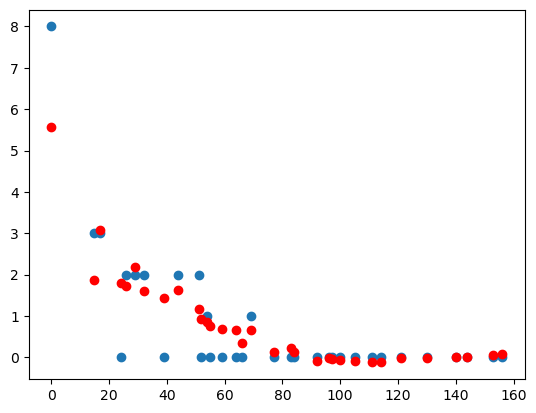

In [171]:
plt.scatter(X_test[:,0],y_test )
plt.scatter(X_test[:,0],regr.predict(X_test), color = 'red' )
#This model predicts the general trend pretty well, but obviously struggles with the outliers.

In [142]:
from sklearn.metrics import r2_score
r2_score(y_test, regr.predict(X_test))

0.9430971354594603

In [212]:
from sklearn.linear_model import LogisticRegression
X = df.loc[:,['4s','Runs', 'BF']].reset_index().to_numpy()
y = df.loc[:,['50']].to_numpy().reshape(-1)

X_train, X_test, y_train, y_test = train_test_split(X,y)

regr = LogisticRegression(max_iter=11111).fit(X_train[:,1:],y_train)
regr.score(X_test[:,1:],y_test)
#logistic regression

0.7560975609756098

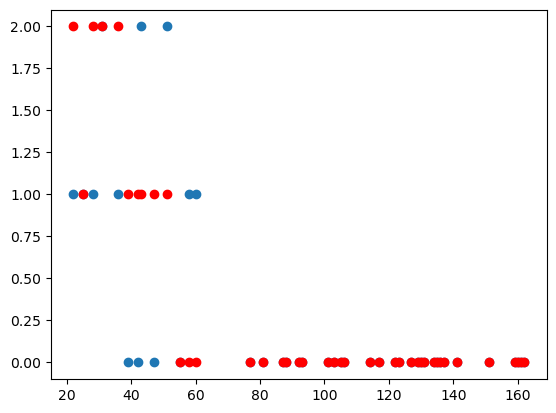

In [213]:
plt.scatter(X_test[:,0],y_test)
plt.scatter(X_test[:,0],regr.predict(X_test[:,1:]), color='red')